In [106]:
from numpy import array, linspace, sqrt, polyfit, poly1d
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

In [108]:
T0, P0, G0 = 418.2, 315600, 34.81

n_stator_blades = 100

k = 1.4
G = array([0.41621, 0.415999, 0.413537, 0.410579, 0.404995, 0.398617, 0.390799, 0.362387]) * n_stator_blades
P1 = 315600
P3 = array([360722, 367309, 374736, 381971, 389181, 396108, 403642, 411152])
T1 = 418.2
T3 = array([443.355, 444.896, 446.533, 448.349, 450.275, 452.259, 453.951, 454.937])

pi = P3 / P1
tau = T3 / T1
eff = (pi ** ((k-1)/k) - 1) / (tau - 1)  # КПД*

G_ = G * (P0/P1) * sqrt(T1/T0)  # приведенный расход
G__ = G_ / G0  # приведенный относительный расход

In [109]:
pd.DataFrame({'G': G, 'G_': G_, 'G__': G__,
              'P*_inlet': [P1] * len(G), 'P*_outlet': P3, 'π*': pi, 
              'T*_inlet': [T1] * len(G), 'T*_outlet': T3, 'τ*': tau, 
              'η*': eff})

G       G_       G__  P*_inlet  P*_outlet        π*  T*_inlet  \
0  41.6210  41.6210  1.195662    315600     360722  1.142972     418.2   
1  41.5999  41.5999  1.195056    315600     367309  1.163843     418.2   
2  41.3537  41.3537  1.187983    315600     374736  1.187376     418.2   
3  41.0579  41.0579  1.179486    315600     381971  1.210301     418.2   
4  40.4995  40.4995  1.163444    315600     389181  1.233146     418.2   
5  39.8617  39.8617  1.145122    315600     396108  1.255095     418.2   
6  39.0799  39.0799  1.122663    315600     403642  1.278967     418.2   
7  36.2387  36.2387  1.041043    315600     411152  1.302763     418.2   

   T*_outlet        τ*        η*  
0    443.355  1.060151  0.647022  
1    444.896  1.063835  0.694037  
2    446.533  1.067750  0.742352  
3    448.349  1.072092  0.777454  
4    450.275  1.076698  0.804532  
5    452.259  1.081442  0.823544  
6    453.951  1.085488  0.851944  
7    454.937  1.087846  0.893573

In [110]:
G__ -= 0.11
pi += 0.1

In [ ]:
f = poly1d(polyfit(G__, pi, 2))

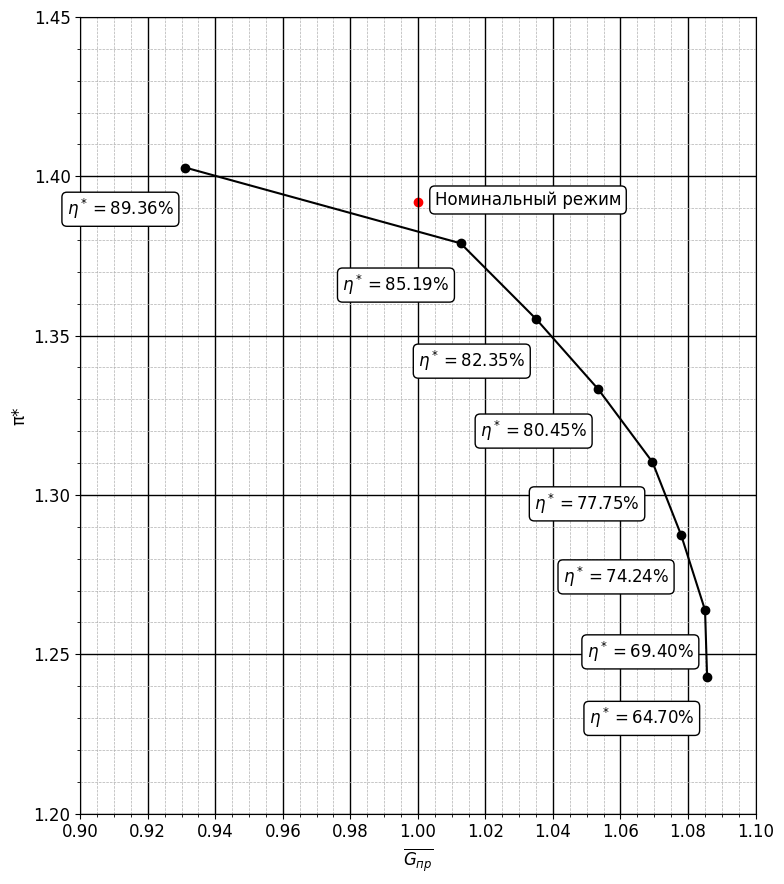

In [136]:
shift = (0.005, -0.001)

plt.figure(figsize=(8, 9))
#plt.title('Характеристика компрессора', fontsize=14)
plt.xlabel(r'$\overline{G_{пр}}$'), plt.ylabel('π*', fontsize=12)

plt.minorticks_on()
plt.grid(which='major', linewidth=1, color='black')
plt.grid(which='minor', linewidth=0.5, linestyle='--')
plt.xlim([0.9, 1.1]), plt.ylim([1.2, 1.45])
plt.xticks(linspace(0.9, 1.1, 11))
plt.yticks(linspace(1.2, 1.45,6))

plt.plot(G__, pi, color='black', marker='o', markersize=6)
#plt.plot(linspace(0.9, 1.1, 100), f(linspace(0.9, 1.1, 100)))
for i, e in enumerate(eff):
    plt.text(G__[i] - 0.035, pi[i] - 0.015, fr'$\eta^*=${e*100:.2f}%',
             bbox={'boxstyle':'round', 'facecolor': '#FFFFFF'})
plt.scatter([1], [1.392], color='red')
plt.text(1 + shift[0], 1.392 + shift[1], 'Номинальный режим',  bbox={'boxstyle':'round', 'facecolor': 'white'})

plt.tight_layout()
plt.show()